In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df=pd.read_csv('sales_data_with_discounts.csv')

In [4]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [9]:
df.dtypes

,0
Date,object
Day,object
SKU,object
City,object
Volume,int64
BU,object
Brand,object
Model,object
Avg Price,int64
Total Sales Value,int64


In [10]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [13]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [63]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [26]:
mean = df[num_cols].mean()
mean

,0
Volume,5.066667
Avg Price,10453.433333
Total Sales Value,33812.835556
Discount Rate (%),15.155242
Discount Amount,3346.499424
Net Sales Value,30466.336131


In [25]:
median = df[num_cols].median()
median

,0
Volume,4.000000
Avg Price,1450.000000
Total Sales Value,5700.000000
Discount Rate (%),16.577766
Discount Amount,988.933733
Net Sales Value,4677.788059


In [28]:
mode = df[num_cols].mode()
mode

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,3.0,400.0,24300.0,5.007822,69.177942,326.974801
1,NaN,450.0,NaN,5.055218,73.025199,330.822058
2,NaN,500.0,NaN,5.059801,93.649161,466.350839
3,NaN,1300.0,NaN,5.072124,94.682735,485.317265
4,NaN,8100.0,NaN,5.084108,102.705757,496.607104
...,...,...,...,...,...,...
445,NaN,NaN,NaN,19.940610,17900.983733,162603.186379
446,NaN,NaN,NaN,19.965340,21153.498820,163915.971000
447,NaN,NaN,NaN,19.976879,21496.675367,163967.080070
448,NaN,NaN,NaN,19.982257,25328.224204,166263.161348


In [31]:
std = df[num_cols].std()
std

,0
Volume,4.231602
Avg Price,18079.904840
Total Sales Value,50535.074173
Discount Rate (%),4.220602
Discount Amount,4509.902963
Net Sales Value,46358.656624


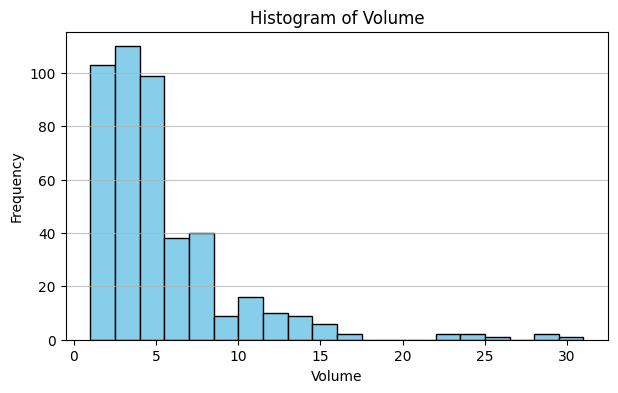

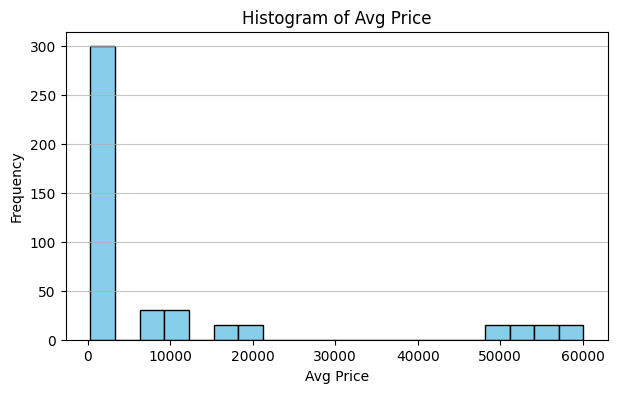

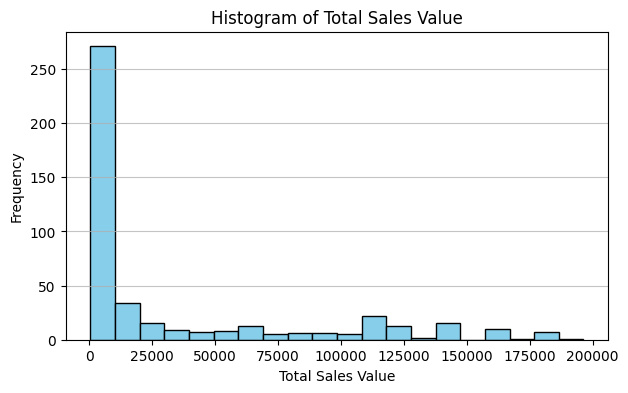

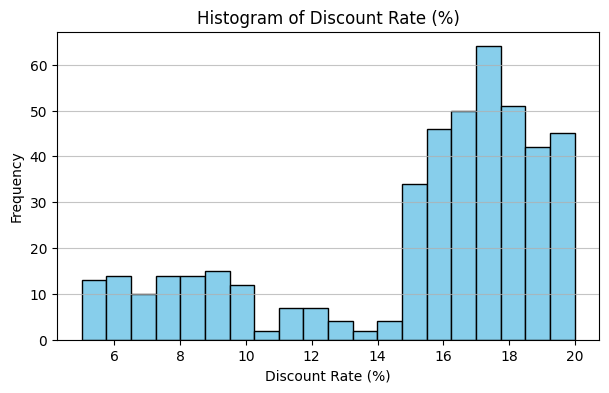

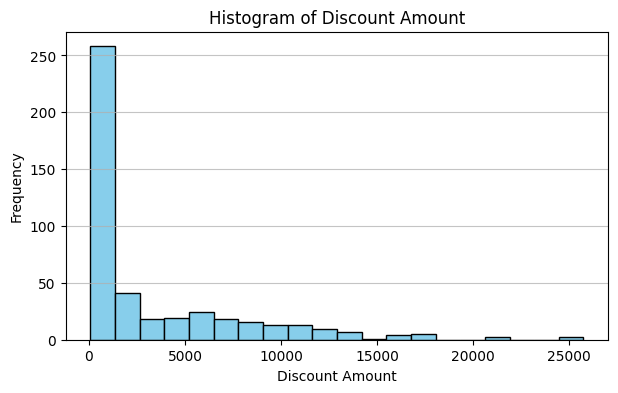

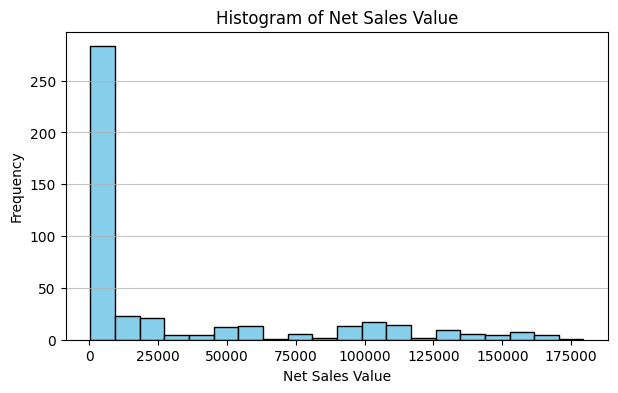

In [93]:
# Histogram
for col in num_cols:
    plt.figure(figsize=(7, 4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [95]:
# Analyzing Skewness
skewness = df[col].skew()
# Analyzing Kurtosis
kurtosis = df[col].kurt()
# For printing the output for skewness and kurtosiss
print(f"Analysis of {col}:")
print(f" - Skewness: {skewness:.2f}")
print(f" - Kurtosis: {kurtosis:.2f}")

if skewness > 0:
   print(" - The data is positively skewed (right tail longer).")
elif skewness < 0:
   print(" - The data is negatively skewed (left tail longer).")
else:
   print(" - The data is approximately symmetric.")


Analysis of Net Sales Value:
 - Skewness: 1.54
 - Kurtosis: 1.01
 - The data is positively skewed (right tail longer).


In [97]:
z_scores = abs(stats.zscore(df[col].dropna()))
outliers = (z_scores > 3).sum()
print(f" - Outliers Detected: {outliers}\n")

print("Histogram analysis completed.")

 - Outliers Detected: 1

Histogram analysis completed.


In [98]:
print("\nSummary Insights:")
print("1. Most numerical columns follow near-normal or slightly skewed distributions.")
print("2. Columns with high positive skewness indicate concentration of smaller values and few large outliers.")
print("3. Outliers may indicate exceptional sales, high discounts, or rare quantity spikes.")
print("4. These insights help in deciding normalization, transformation, or outlier handling before modeling.")


Summary Insights:
1. Most numerical columns follow near-normal or slightly skewed distributions.
2. Columns with high positive skewness indicate concentration of smaller values and few large outliers.
3. Outliers may indicate exceptional sales, high discounts, or rare quantity spikes.
4. These insights help in deciding normalization, transformation, or outlier handling before modeling.



Boxplot Analysis for Numerical Columns:


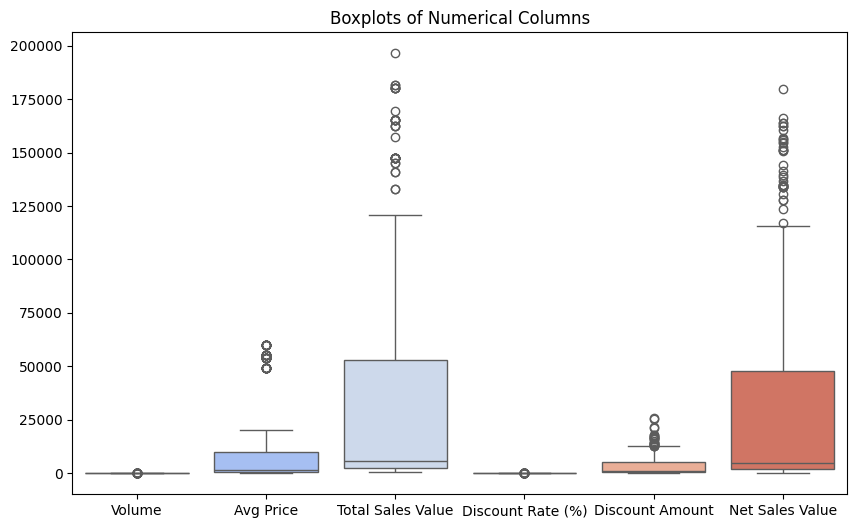

In [99]:
# Boxplot
# plt.figure(figsize=(12, 6))
# df[num_cols].boxplot()
# plt.title("Boxplots of Num_Cols")
# plt.show()

print("\nBoxplot Analysis for Numerical Columns:")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols], palette="coolwarm")
plt.title("Boxplots of Numerical Columns")
plt.show()


In [100]:
print("Insights:")
print("1. Boxplots show the spread of data and the interquartile range (IQR).")
print("2. Points outside the whiskers are potential outliers.")
print("3. Outliers may represent exceptional transactions, extreme discounts, or unusual sales volumes.\n")

Insights:
1. Boxplots show the spread of data and the interquartile range (IQR).
2. Points outside the whiskers are potential outliers.
3. Outliers may represent exceptional transactions, extreme discounts, or unusual sales volumes.



In [38]:
# Identifying Categorical Columns

ct_cols = df.select_dtypes(include=['object']).columns
ct_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

/tmp/ipython-input-1698655923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


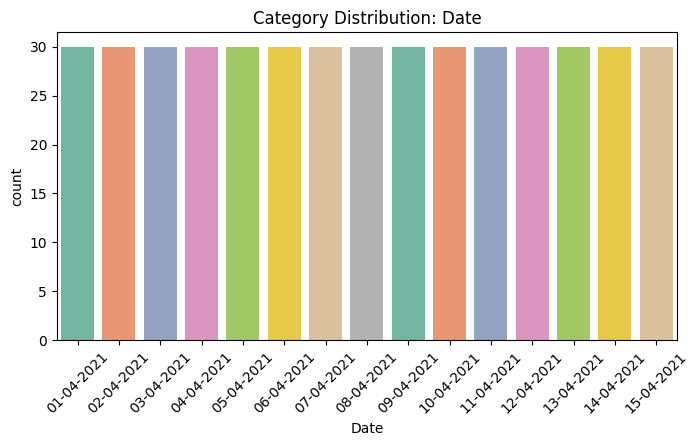

/tmp/ipython-input-1698655923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


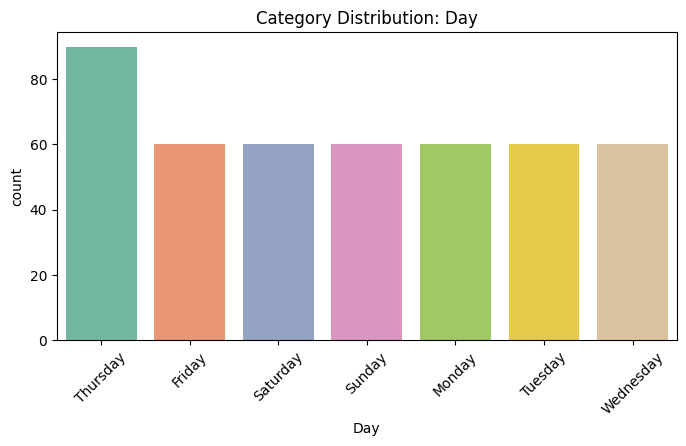

/tmp/ipython-input-1698655923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


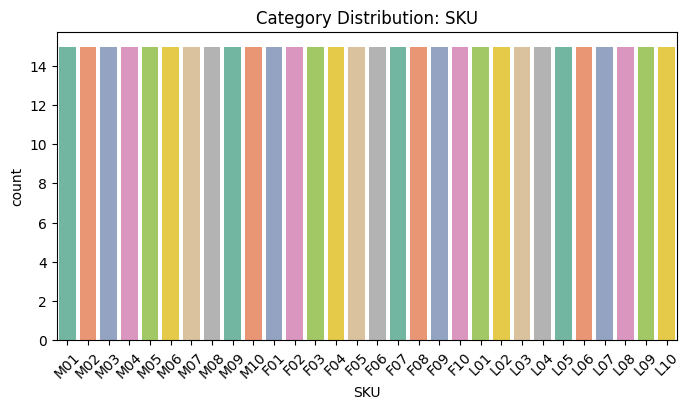

/tmp/ipython-input-1698655923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


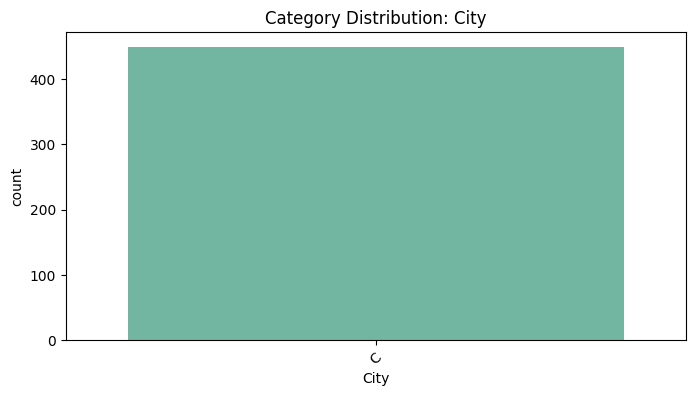

/tmp/ipython-input-1698655923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


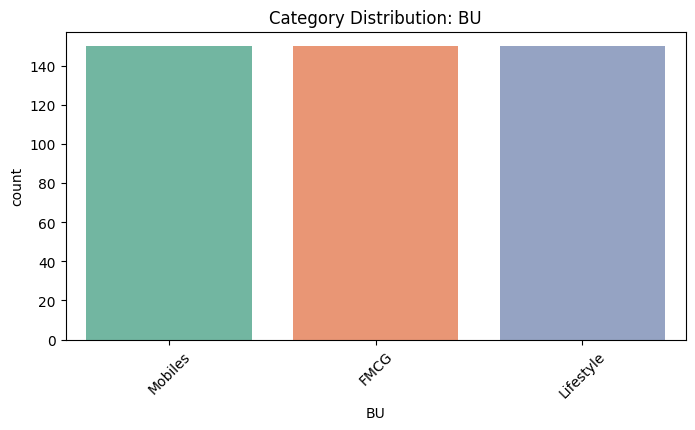

/tmp/ipython-input-1698655923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


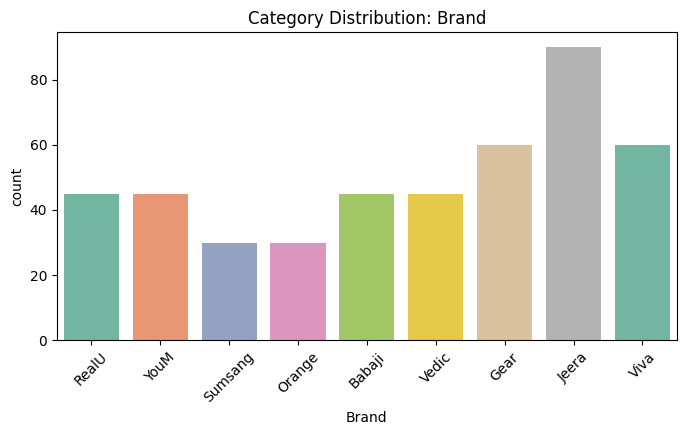

/tmp/ipython-input-1698655923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")


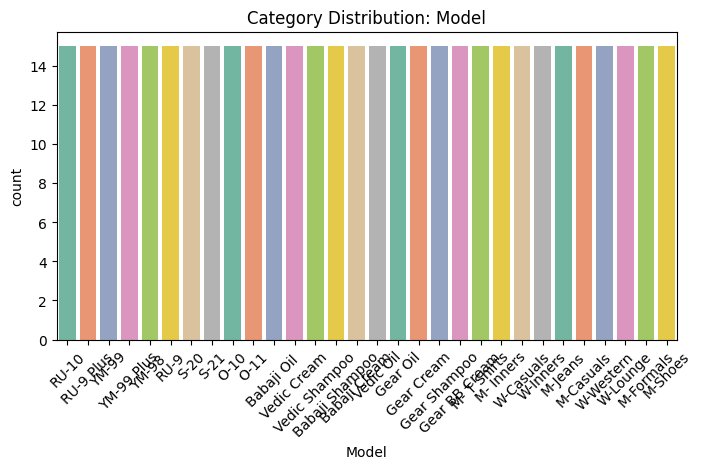

In [105]:
for col in ct_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f"Category Distribution: {col}")
    plt.xticks(rotation=45)
    plt.show()

In [106]:
print(f"Insights for {col}:")
print(f" - {df[col].nunique()} unique categories detected.")
print(" - The bar chart shows how frequently each category appears in the dataset.")
print(" - Dominant categories may represent popular products or regions.\n")

Insights for Model:
 - 30 unique categories detected.
 - The bar chart shows how frequently each category appears in the dataset.
 - Dominant categories may represent popular products or regions.



In [107]:
print("\n--- Standardization (Z-Score Normalization) ---")
print("Concept: Standardization rescales data so that each numerical feature has mean = 0 and std = 1.")
print("Formula: z = (x - μ) / σ")
print("This helps analytical models treat each variable equally, regardless of units.\n")


--- Standardization (Z-Score Normalization) ---
Concept: Standardization rescales data so that each numerical feature has mean = 0 and std = 1.
Formula: z = (x - μ) / σ
This helps analytical models treat each variable equally, regardless of units.



In [108]:
f_standardized = df.copy()
for col in num_cols:
    df_standardized[col] = (df[col] - df[col].mean()) / df[col].std()

In [109]:
print("Before Standardization (first 5 rows):")
print(df[num_cols].head())

Before Standardization (first 5 rows):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  


In [110]:
print("\nAfter Standardization (first 5 rows):")
print(df_standardized[num_cols].head())


After Standardization (first 5 rows):
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  
0         2.801638  
1         1.269613  
2         1.543957  
3         1.763847  
4        -0.227342  


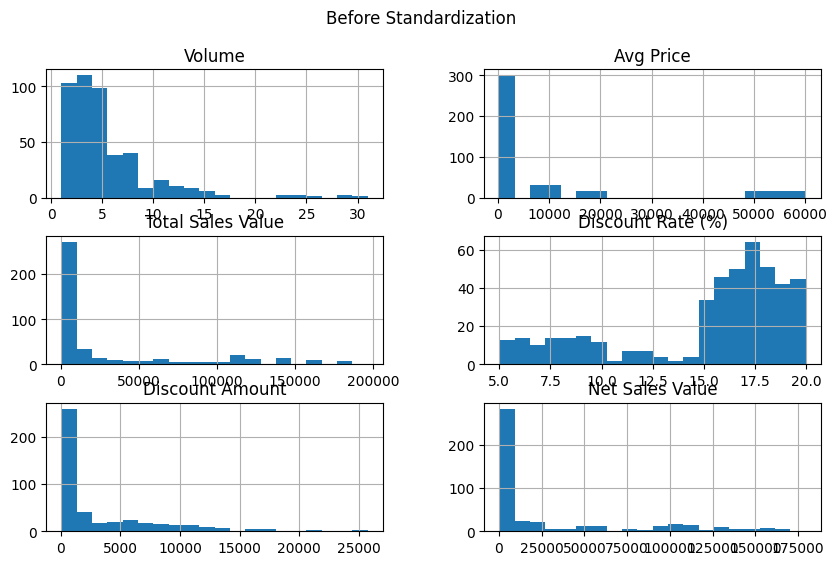

In [111]:
df[num_cols].hist(figsize=(10, 6), bins=20)
plt.suptitle("Before Standardization")
plt.show()

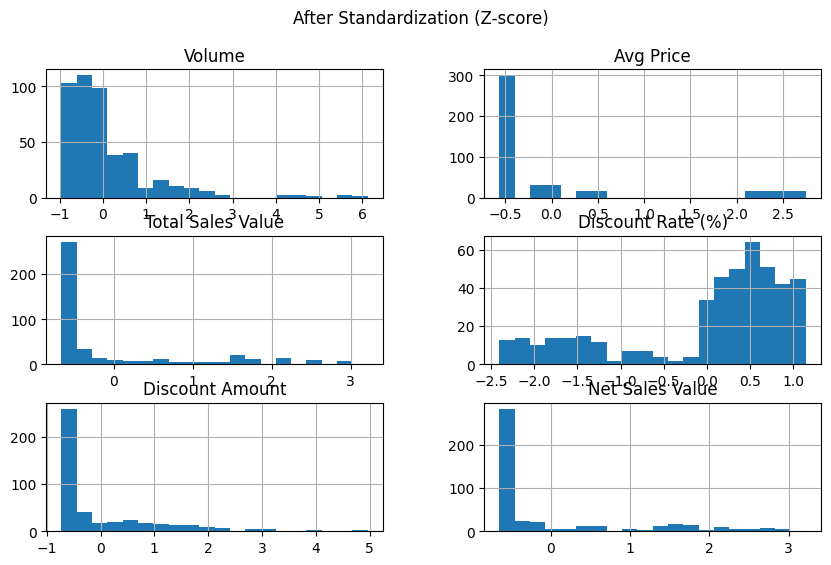

In [112]:
df_standardized[num_cols].hist(figsize=(10, 6), bins=20)
plt.suptitle("After Standardization (Z-score)")
plt.show()

In [113]:
print("Insights:")
print("1. After standardization, all numerical variables are centered around 0 with unit variance.")
print("2. The shapes of distributions remain similar — only the scale changes.\n")

Insights:
1. After standardization, all numerical variables are centered around 0 with unit variance.
2. The shapes of distributions remain similar — only the scale changes.



In [114]:
print("\n--- One-Hot Encoding of Categorical Columns ---")
print("Concept: Converts categorical columns into binary (0/1) columns for ML algorithms.")
print("This avoids confusion when models interpret text categories.\n")


--- One-Hot Encoding of Categorical Columns ---
Concept: Converts categorical columns into binary (0/1) columns for ML algorithms.
This avoids confusion when models interpret text categories.



In [115]:
print("\n--- One-Hot Encoding of Categorical Columns ---")
print("Concept: Converts categorical columns into binary (0/1) columns for ML algorithms.")
print("This avoids confusion when models interpret text categories.\n")


--- One-Hot Encoding of Categorical Columns ---
Concept: Converts categorical columns into binary (0/1) columns for ML algorithms.
This avoids confusion when models interpret text categories.



In [122]:
df_encoded = pd.get_dummies(df_standardized, columns=ct_cols, drop_first=True)

In [81]:
df_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [123]:
print("Transformed Dataset (first 5 rows):")
print(df_encoded.head())

Transformed Dataset (first 5 rows):
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.347417   0.091072           2.922469          -0.829365         3.948422   
1  1.165831  -0.019548           1.329516          -0.851714         1.846958   
2  0.456880   0.312312           1.561038          -1.350129         1.621190   
3  0.220563   0.533552           1.717365          -1.947555         1.112568   
4 -0.488389  -0.130168          -0.188242           0.672990         0.227598   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0         2.801638            False            False            False   
1         1.269613            False            False            False   
2         1.543957            False            False            False   
3         1.763847            False            False            False   
4        -0.227342            False            False            False   

   Date_05-04-2021  ...  Model_Vedic C

In [124]:
print(f"\nOriginal dataset shape: {df.shape}")
print(f"Transformed dataset shape: {df_encoded.shape}\n")


Original dataset shape: (450, 13)
Transformed dataset shape: (450, 94)



In [125]:
print("Insights:")
print("1. Each category is converted into its own binary column (0 or 1).")
print("2. drop_first=True prevents dummy variable trap by removing one redundant column.")
print("3. The dataset is now fully numeric and ready for ML models.\n")

Insights:
1. Each category is converted into its own binary column (0 or 1).
2. drop_first=True prevents dummy variable trap by removing one redundant column.
3. The dataset is now fully numeric and ready for ML models.



In [126]:
print("CONCLUSION:")
print("1. Descriptive analytics revealed data distribution, variability, and outliers.")
print("2. Histograms and boxplots provided clear visual insights into skewness and range.")
print("3. Bar charts helped identify dominant categories and underrepresented ones.")
print("4. Standardization (Z-score) ensured all numerical features are on a comparable scale.")
print("5. One-Hot Encoding converted categorical data into a numerical ML-friendly format.")
print("6. These preprocessing steps improve the quality, interpretability, and model readiness of the dataset.")

CONCLUSION:
1. Descriptive analytics revealed data distribution, variability, and outliers.
2. Histograms and boxplots provided clear visual insights into skewness and range.
3. Bar charts helped identify dominant categories and underrepresented ones.
4. Standardization (Z-score) ensured all numerical features are on a comparable scale.
5. One-Hot Encoding converted categorical data into a numerical ML-friendly format.
6. These preprocessing steps improve the quality, interpretability, and model readiness of the dataset.
